<a href="https://colab.research.google.com/github/ismael-almazan/Programaci-n-para-anal-tica-descriptiva-y-predictiva/blob/main/Practica24_263177.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Práctica: Regresión Lineal Múltiple
---


## Datos del Estudiante

*   Almazan Luna Ismael
*   Matrícula: 263177

---



##  Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar regresión lineal múltiple utilizando Scikit-Learn para modelar la relación entre varias variables independientes y una variable dependiente**, verificar los supuestos del modelo, interpretar los coeficientes, analizar la correlación entre predictores y evaluar el rendimiento del modelo utilizando métricas como el MSE, RMSE y R².

Datos
Trabajarás con el archivo `advertising.csv`, que contiene información sobre el gasto publicitario en diferentes medios y las ventas obtenidas:

-`TV`: inversión en publicidad televisiva.

-`Radio`: inversión en publicidad en radio.

-`Newspaper`: inversión en publicidad en periódicos.

`Sales`: ventas del producto (variable dependiente).

## Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `advertising.csv`.
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente las variables.

In [308]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler
#Cargar el archivo
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/advertising.csv')

#Primeras filas
print(df.head())

#Descripción estadística
print(df.describe())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


## Parte 2: Análisis exploratorio de los datos
### 2.1  Análisis de la Relación Lineal entre la variable dependiente y las independientes
1. Grafica dispersión entre cada variable independiente (`TV`, `Radio`, `Newspaper`) y `Sales`. Usa también regplot.
2. Interpreta visualmente la relación entre variables.

*En los tres casos se observan relaciones positivas, incremento en inversion en publicidad en los tres tipos de medios se relaciona con incremento en ventas, en el caso de TV la relacion es muy clara, sin embargo para Radio y Newspaper la relacion visualmente sin ayuda de la linea de tendencia no es del todo clara debido a que la varinaza de los datos es mayor.*

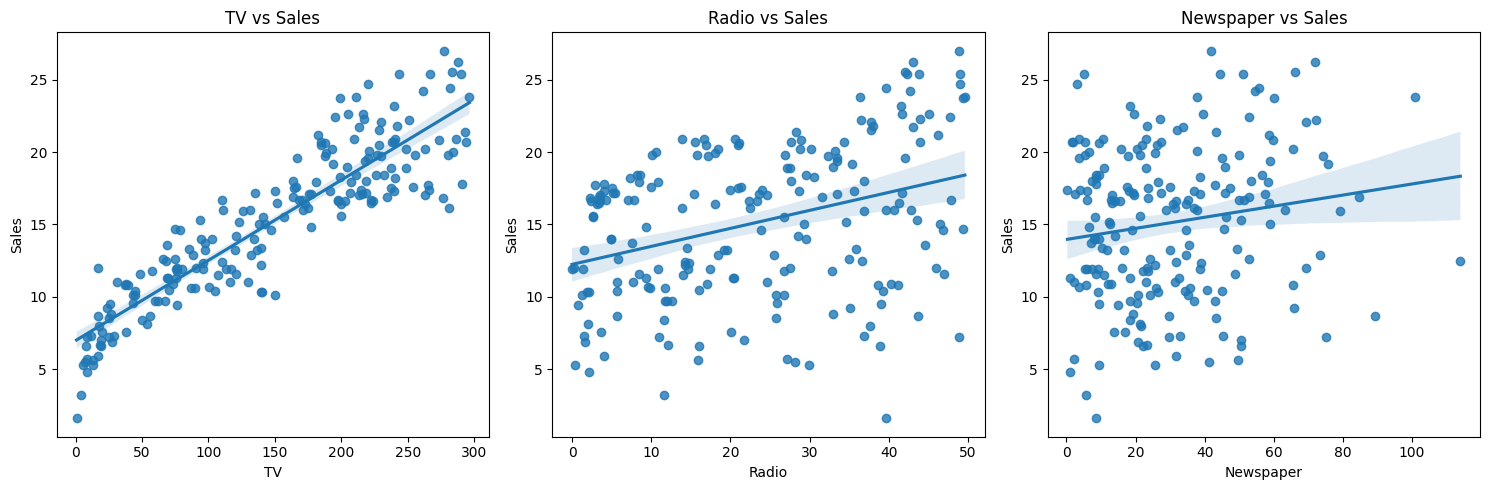

In [310]:
# Gráficos de dispersión
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.regplot(x='TV', y='Sales', data=df, ax=axes[0])
axes[0].set_title('TV vs Sales')

sns.regplot(x='Radio', y='Sales', data=df, ax=axes[1])
axes[1].set_title('Radio vs Sales')

sns.regplot(x='Newspaper', y='Sales', data=df, ax=axes[2])
axes[2].set_title('Newspaper vs Sales')

plt.tight_layout()
plt.show()

### 2.2: Correlación entre variables
1. Calcula la matriz de correlación.
2. Visualízala con un heatmap.
3. Responde: ¿Qué variables están más correlacionadas con `Sales`? ¿Hay correlación alta entre predictores?

* TV es la variable que esta mas fuertemente relacionada con Sales
* Las variables predictoras no muestran correlacion fuerte, lo cual indica que no existe problema de multicolinealidad


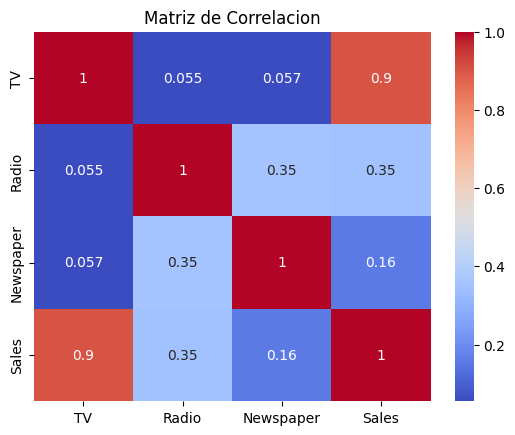

In [311]:
# Correlación y heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlacion')
plt.show()

## Parte 3. Multicolinealidad
1. Calcula el VIF (Variance Inflation Factor) para cada predictor.
2. Crea un diagrama de barras  para mostrar el  VIF
3. Interpreta si hay multicolinealidad:
- ¿Alguna variable tiene un VIF mayor a 5 o mayor a 10? *Las predictoras tiene un VIF menor a 5, unicamente el termino constante es mayor con 6.84, sin embagro esto no supone un problema de multicolielidad*
- ¿Qué implicaciones tiene esto para el modelo?


    Variable       VIF
0      const  6.848900
1         TV  1.004611
2      Radio  1.144952
3  Newspaper  1.145187


/tmp/ipython-input-2705009895.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VIF', y='Variable', data=vif_data, palette='coolwarm')


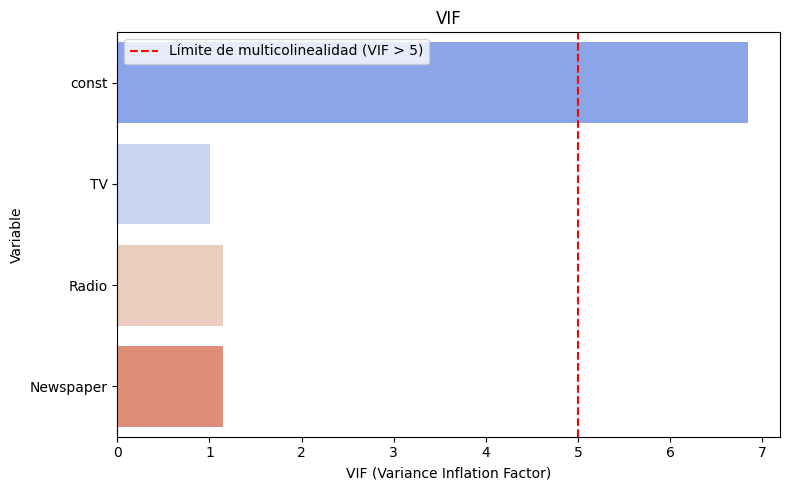

In [312]:
#Multicolinealidad
X = add_constant(df.drop(columns=['Sales']))
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

plt.figure(figsize=(8, 5))
sns.barplot(x='VIF', y='Variable', data=vif_data, palette='coolwarm')
plt.axvline(x=5, color='red', linestyle='--', label='Límite de multicolinealidad (VIF > 5)')
plt.xlabel('VIF (Variance Inflation Factor)')
plt.title('VIF')
plt.legend()
plt.tight_layout()
plt.show()

## Parte 4: Construcción del Modelo (Todas las variables Independientes), Evaluación

### 4.1 Entrenamiento del Modelo (Todas las Variables Independientes)

1. Entrena un modelo de regresión lineal múltiple usando TV, Radio y Newspaper como variables independientes.
2. Imprime el intercepto y los coeficientes del modelo.
3. Interpreta cada uno:
¿Qué significa cada uno de los coeficientes  en términos de ventas?

* El coeficiente del intercepto es de : 15.13, el cual indica que cuando todas las demas variables independientes (inversion en publicidad en TV, Radio y Newspaper) son de cero, las ventas seran en promeido de : 15.13.
* Para el caso de TV es de 4.66, lo que quiere decir que si mentiene todo lo demas constante, por cada pero que se invierta en publicidad en TV, las ventas incrementaran en promedio 4.6627 unidades monetarias.
* Para radio es de 1.58, lo que indica que manteniendo todas las demas variables constantes, el incremento de una unidad monetaria en publidad en Radio, las ventas incrementaran en promedio en 1.58.
* Y finamente para Nespaper tambien es positivo, de 0.0072, lo que quiere decir que si se mantiene contante la inversion en Radio y Tv, el incremenro de $1 en publicidad de Newspapers incremenetara en primedio las ventas en 0.0072

In [313]:
# Definir variable dependiente e independientes del modelo
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

#Modelo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = LinearRegression()
model.fit(X_scaled,y)

coefficients = model.coef_
intercept = model.intercept_

#Coeficinetes e intercepto de la estimacion
print(f"\nCoeficientes estimados: {coefficients}")
print(f"Término independiente estimado: {intercept}")

print('\n')
equation = f"Sales = {intercept} "
for i, coef in enumerate(coefficients):
  equation += f"+ ({coef} * {X.columns[i]}) "

equation


Coeficientes estimados: [4.66270025 1.58465027 0.00729187]
Término independiente estimado: 15.130500000000001




'Sales = 15.130500000000001 + (4.662700245086694 * TV) + (1.5846502733236385 * Radio) + (0.0072918683037688226 * Newspaper) '

### 4.2 Normalidad de los residuos

1. Calcula los residuos: residuos = y - y_pred.

2. Grafica un histograma con KDE de los residuos.

3. ¿Los residuos parecen distribuirse normalmente?

* Los errores paren cumplir con el supuesto de normalidad, aunque con una ligera asimetria negativa, la media esta aproximadamente en cero, y con una variabilidad rezonable.

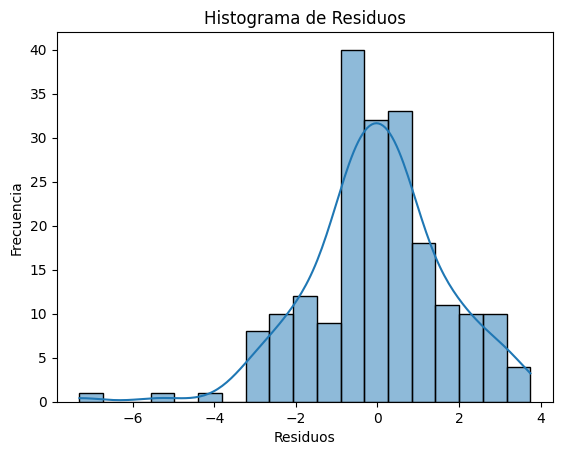

In [314]:
residuos = y - model.predict(X_scaled)

sns.histplot(residuos, kde=True)
plt.title('Histograma de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

### 4.3. Homocedasticidad

1. Grafica los residuos contra los valores predichos.
2. ¿Observas patrones? ¿Los residuos se dispersan aleatoriamente?

*  No se observa algun patron el el comportamiento de los residuo, los valores de distribuyen alrededor de cero, la varinaza es constante (No homocedasticidad), unicamente uno o dos valores atipicos en la parte inferior, lo que podria afectar ligeramente los coeficientes.

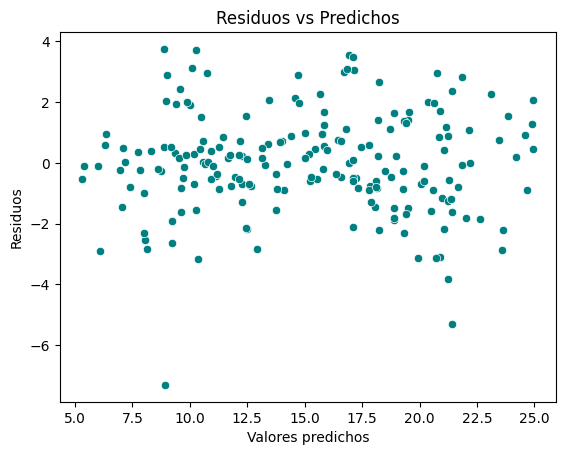

In [315]:
sns.scatterplot(x=model.predict(X_scaled), y=residuos, color='teal')
plt.title('Residuos vs Predichos')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.show()

### 4.4 Q-Q Plot

1. Graficar el Q-Q Plot
2. Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal, b) Desviaciones sistemáticas indican asimetría o colas pesadas.

* El diagrama muestra que los residios estan casi normalmente distribuidos, el modelo tiene un buen ajuste lienal,solamente como ya anteriormente en el histograma, se detectan algunos valores tipicos en la parte inferior

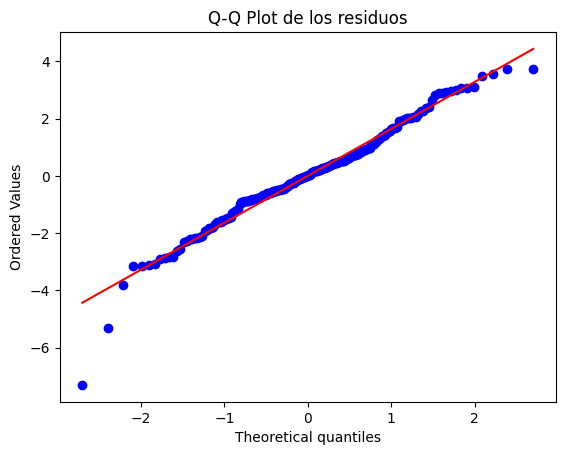

In [316]:
stats.probplot(residuos, dist='norm', plot=plt)
plt.title('Q-Q Plot de los residuos')
plt.show()

### 4.5. Evaluación del Modelo

1. Calcula las métricas: a) MSE (error cuadrático medio), b) RMSE (raíz del error cuadrático medio), c) R² (coeficiente de determinación)

2. ¿Qué nos dicen estas métricas sobre el ajuste del modelo?

* Las metricas indican que el modelo tiene un buen ajuste, explica el 90% de la variacion de las ventas con las tres variables independintes, asi como un nivel bajo de error (MSE y RMSE)


In [317]:
mse = mean_squared_error(y, model.predict(X_scaled))
rmse = np.sqrt(mse)
r2 = r2_score(y, model.predict(X_scaled))

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MSE: 2.7060061476273165
RMSE: 1.6449942697855566
R²: 0.9025912899684558


### 4.6. Visualización de Predicciones

1. Crea un gráfico comparando Sales reales vs Sales predichas.

2. Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste.
3.¿Qué observas?¿Qué observas? ¿Qué información puedes obtener de esta gráfica?

* El modelo se ajusta bien, predice bien las ventas, los valores estan muy cerca de la linea.

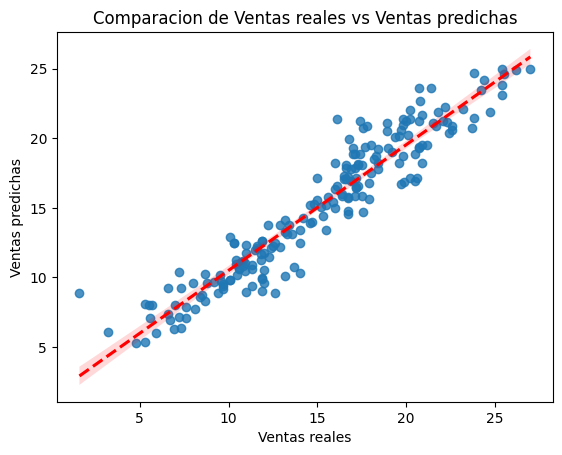

In [318]:
#Visualización de las Predicciones
y_pred = model.predict(X_scaled)

sns.regplot(x=y, y=y_pred, line_kws={'color': 'red', 'linestyle': '--'})
plt.xlabel('Ventas reales')
plt.ylabel('Ventas predichas')
plt.title('Comparacion de Ventas reales vs Ventas predichas')
plt.show()

### 4.7 Verificar el impacto de los atributos en el modelo

1. Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.
2. Interpreta los resultados:

 - Observa los valores P>|t| en la tabla de salida.

 - ¿Qué variables tienen p-value menores a 0.05?

 - ¿Cuál es la conclusión sobre esas variables?
-------------------------------
* Las variables TV y Radio son estadisticamente significativas a un nivel de 5%, lo que indica que tienen un efecto real y positivo sobre las ventas
* En cambio Newspaper no es estadisticamente significativo, ya que su P-value es mayor a 0.05.

* Finamenrte el modelo en terminios generales es estadisticamente signitivo dado el valor de la prueba F

In [319]:
#P-values
X = add_constant(df[['TV', 'Radio', 'Newspaper']])
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sun, 02 Nov 2025   Prob (F-statistic):           8.13e-99
Time:                        04:11:35   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

##Parte 5:  Construcción del Modelo (sin Multicolinealidad), Evaluación

En el caso de que hayas detectado variables con multicolinealidad. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.



* NO se detecto problema de multicolinealidad entre las variables independientes, sus correlaciones no son elevadas , asi como  los VIF son relativamente bajos.

## Parte 6: Construcción del Modelo (sin variables que no muestran una relación lineal), Evaluación

En el caso de que hayas detectado variables sin una relación lineal con la variable dependiente. Elimina aquellas que presenten esta característica y realiza lo siguiente.

En el caso de que hayas detectado variables sin una relación lineal. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

* MODELO SIN LA VARIABLE "NEWSPAPER" (POR SE NO SIGNIFICATIVA EN EL ANTERIOR MODELO)

## II. Parte 1: Carga de datos y bibliotecas

In [320]:
#Cargar el archivo
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/advertising.csv', usecols=['TV', 'Radio', 'Sales'])

#Primeras filas
print(df.head())

#Descripción estadística
print(df.describe())

      TV  Radio  Sales
0  230.1   37.8   22.1
1   44.5   39.3   10.4
2   17.2   45.9   12.0
3  151.5   41.3   16.5
4  180.8   10.8   17.9
               TV       Radio       Sales
count  200.000000  200.000000  200.000000
mean   147.042500   23.264000   15.130500
std     85.854236   14.846809    5.283892
min      0.700000    0.000000    1.600000
25%     74.375000    9.975000   11.000000
50%    149.750000   22.900000   16.000000
75%    218.825000   36.525000   19.050000
max    296.400000   49.600000   27.000000


## II. Parte 2: Análisis exploratorio de los datos

* Para ambas variables se obsevera una corrlacion positiva, con mayor nivel en TV, donde es mas evidente la correlacion

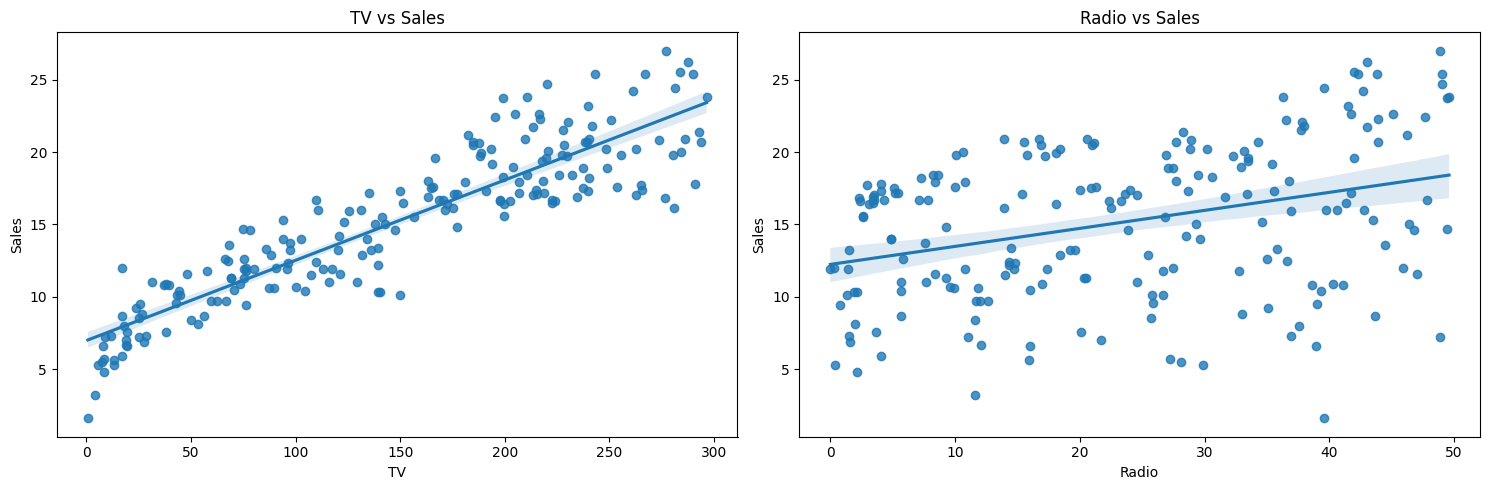

In [321]:
# Gráficos de dispersión
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.regplot(x='TV', y='Sales', data=df, ax=axes[0])
axes[0].set_title('TV vs Sales')

sns.regplot(x='Radio', y='Sales', data=df, ax=axes[1])
axes[1].set_title('Radio vs Sales')

plt.tight_layout()
plt.show()

### II. 2.2: Correlación entre variables
1. Calcula la matriz de correlación.
2. Visualízala con un heatmap.
3. Responde: ¿Qué variables están más correlacionadas con `Sales`? ¿Hay correlación alta entre predictores?

* TV es la variable que esta mas fuertemente relacionada con Sales
* Las variables predictoras no muestran correlacion fuerte, lo cual indica que no existe problema de multicolinealidad


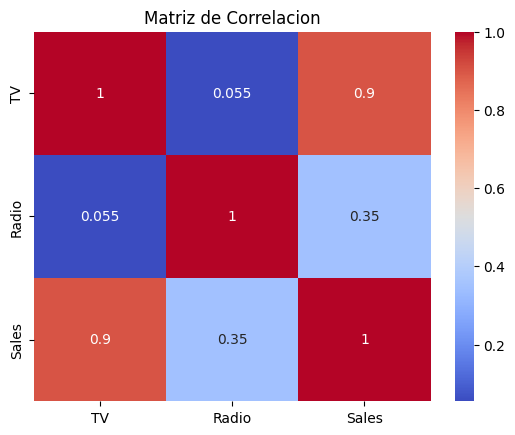

In [322]:
# Correlación y heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlacion')
plt.show()

## II.  Parte 3. Multicolinealidad
1. Calcula el VIF (Variance Inflation Factor) para cada predictor.
2. Crea un diagrama de barras  para mostrar el  VIF
3. Interpreta si hay multicolinealidad:
- ¿Alguna variable tiene un VIF mayor a 5 o mayor a 10? *Las predictoras tiene un VIF menor a 5, unicamente el termino constante es mayor con 6.13, sin embagro esto no supone un problema de multicolielidad*
- ¿Qué implicaciones tiene esto para el modelo?


  Variable       VIF
0    const  6.135476
1       TV  1.003013
2    Radio  1.003013


/tmp/ipython-input-2705009895.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VIF', y='Variable', data=vif_data, palette='coolwarm')


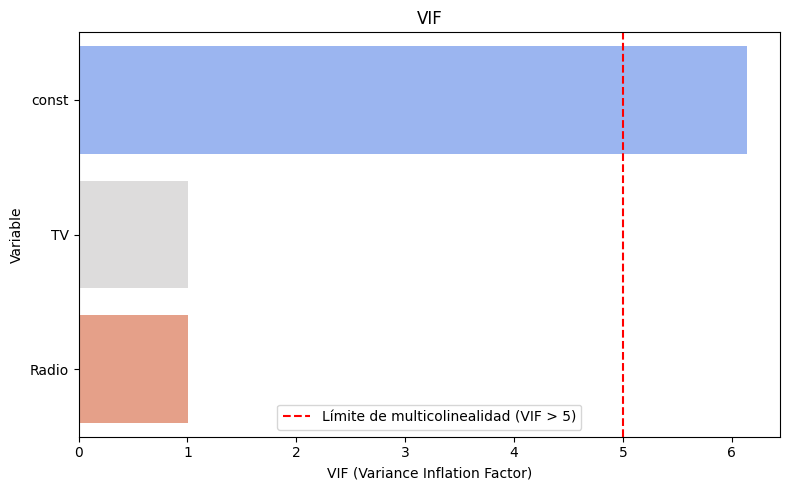

In [323]:
#Multicolinealidad
X = add_constant(df.drop(columns=['Sales']))
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

plt.figure(figsize=(8, 5))
sns.barplot(x='VIF', y='Variable', data=vif_data, palette='coolwarm')
plt.axvline(x=5, color='red', linestyle='--', label='Límite de multicolinealidad (VIF > 5)')
plt.xlabel('VIF (Variance Inflation Factor)')
plt.title('VIF')
plt.legend()
plt.tight_layout()
plt.show()

## II. Parte 4: Construcción del Modelo (Todas las variables Independientes), Evaluación

### 4.1 Entrenamiento del Modelo (Todas las Variables Independientes)

1. Entrena un modelo de regresión lineal múltiple usando TV, Radio y Newspaper como variables independientes.
2. Imprime el intercepto y los coeficientes del modelo.
3. Interpreta cada uno:
¿Qué significa cada uno de los coeficientes  en términos de ventas?

* El coeficiente del intercepto es de : 15.13, el cual indica que cuando todas las demas variables independientes (inversion en publicidad en TV, Radio y Newspaper) son de cero, las ventas seran en promeido de : 15.13.
* Para el caso de TV es de 4.66, lo que quiere decir que si mentiene todo lo demas constante, por cada pero que se invierta en publicidad en TV, las ventas incrementaran en promedio 4.6627 unidades monetarias.
* Para radio es de 1.58, lo que indica que manteniendo todas las demas variables constantes, el incremento de una unidad monetaria en publidad en Radio, las ventas incrementaran en promedio en 1.58.


* El cambio respescto al anterior modelo fue minimo en los coeficinetes

In [324]:
# Definir variable dependiente e independientes del modelo
X = df[['TV', 'Radio']]
y = df['Sales']

#Modelo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = LinearRegression()
model.fit(X_scaled,y)

coefficients = model.coef_
intercept = model.intercept_

#Coeficinetes e intercepto de la estimacion
print(f"\nCoeficientes estimados: {coefficients}")
print(f"Término independiente estimado: {intercept}")

print('\n')
equation = f"Sales = {intercept} "
for i, coef in enumerate(coefficients):
  equation += f"+ ({coef} * {X.columns[i]}) "

equation


Coeficientes estimados: [4.66297261 1.58721742]
Término independiente estimado: 15.130500000000001




'Sales = 15.130500000000001 + (4.662972611875511 * TV) + (1.5872174231801197 * Radio) '

### II. 4.2 Normalidad de los residuos

1. Calcula los residuos: residuos = y - y_pred.

2. Grafica un histograma con KDE de los residuos.

3. ¿Los residuos parecen distribuirse normalmente?

* Los errores paren cumplir con el supuesto de normalidad, aunque con una ligera asimetria negativa, la media esta aproximadamente en cero, y con una variabilidad rezonable.

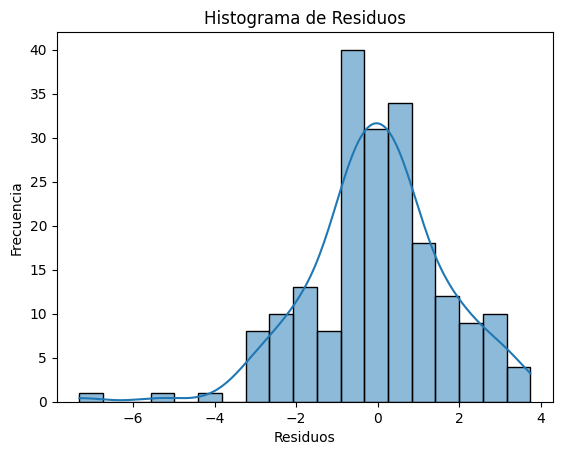

In [325]:
residuos = y - model.predict(X_scaled)

sns.histplot(residuos, kde=True)
plt.title('Histograma de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

### II.  4.3. Homocedasticidad

1. Grafica los residuos contra los valores predichos.
2. ¿Observas patrones? ¿Los residuos se dispersan aleatoriamente?

*  No se observa algun patron el el comportamiento de los residuo, los valores de distribuyen alrededor de cero, la varinaza es constante (No homocedasticidad), unicamente uno o dos valores atipicos en la parte inferior, lo que podria afectar ligeramente los coeficientes.

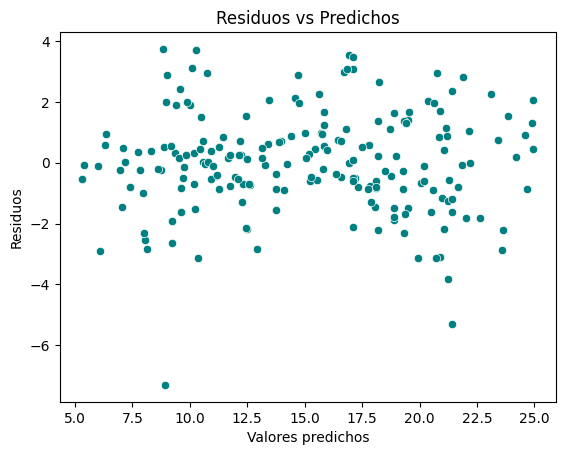

In [326]:
sns.scatterplot(x=model.predict(X_scaled), y=residuos, color='teal')
plt.title('Residuos vs Predichos')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.show()

### II. 4.4 Q-Q Plot

1. Graficar el Q-Q Plot
2. Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal, b) Desviaciones sistemáticas indican asimetría o colas pesadas.

* El diagrama muestra que los residios estan casi normalmente distribuidos, el modelo tiene un buen ajuste lienal,solamente como ya anteriormente en el histograma, se detectan algunos valores tipicos en la parte inferior

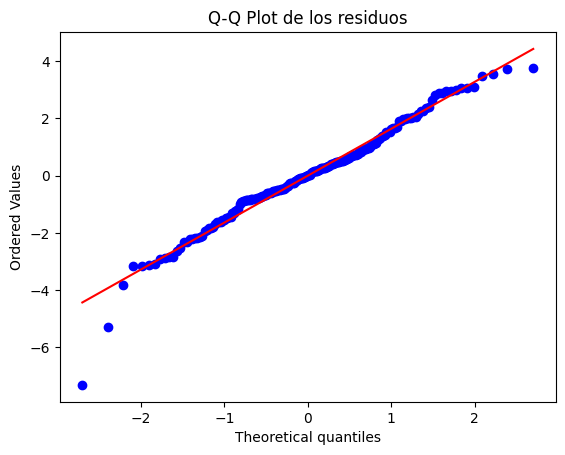

In [327]:
stats.probplot(residuos, dist='norm', plot=plt)
plt.title('Q-Q Plot de los residuos')
plt.show()

### II. 4.5. Evaluación del Modelo

1. Calcula las métricas: a) MSE (error cuadrático medio), b) RMSE (raíz del error cuadrático medio), c) R² (coeficiente de determinación)

2. ¿Qué nos dicen estas métricas sobre el ajuste del modelo?

* Las metricas indican que el modelo tiene un buen ajuste, explica el 90% de la variacion de las ventas con las tres variables independintes, asi como un nivel bajo de error (MSE y RMSE)


In [328]:
mse = mean_squared_error(y, model.predict(X_scaled))
rmse = np.sqrt(mse)
r2 = r2_score(y, model.predict(X_scaled))

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MSE: 2.7060525778834883
RMSE: 1.6450083823140502
R²: 0.9025896186081139


### II. 4.6. Visualización de Predicciones

1. Crea un gráfico comparando Sales reales vs Sales predichas.

2. Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste.
3.¿Qué observas?¿Qué observas? ¿Qué información puedes obtener de esta gráfica?

* El modelo se ajusta bien, predice bien las ventas, los valores estan muy cerca de la linea.

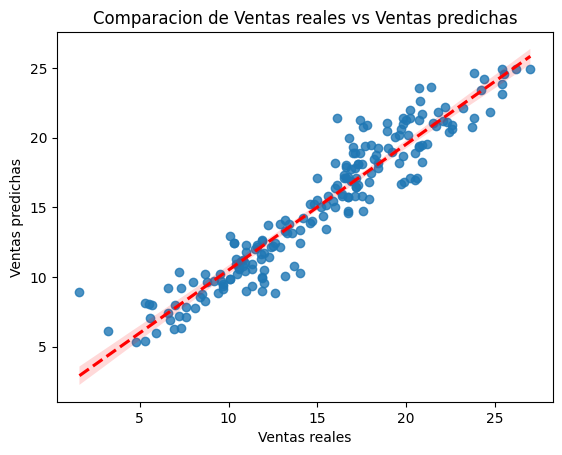

In [329]:
#Visualización de las Predicciones
y_pred = model.predict(X_scaled)

sns.regplot(x=y, y=y_pred, line_kws={'color': 'red', 'linestyle': '--'})
plt.xlabel('Ventas reales')
plt.ylabel('Ventas predichas')
plt.title('Comparacion de Ventas reales vs Ventas predichas')
plt.show()

### II. 4.7 Verificar el impacto de los atributos en el modelo

1. Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.
2. Interpreta los resultados:

 - Observa los valores P>|t| en la tabla de salida.

 - ¿Qué variables tienen p-value menores a 0.05?

 - ¿Cuál es la conclusión sobre esas variables?
-------------------------------
* Las variables TV y Radio son estadisticamente significativas a un nivel de 5%, lo que indica que tienen un efecto real y positivo sobre las ventas
* En cambio Newspaper no es estadisticamente significativo, ya que su P-value es mayor a 0.05.

* Finamenrte el modelo en terminios generales es estadisticamente signitivo dado el valor de la prueba F

In [330]:
#P-values
X = add_constant(df[['TV', 'Radio']])
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Sun, 02 Nov 2025   Prob (F-statistic):          2.39e-100
Time:                        04:11:37   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6309      0.290     15.952      0.0

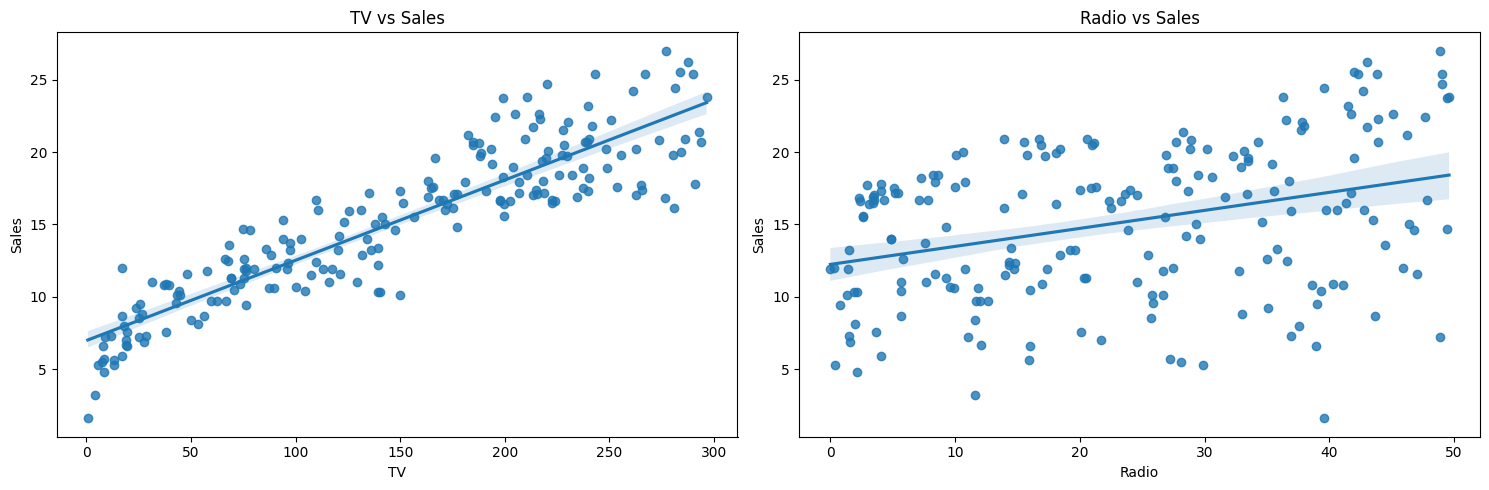

In [331]:
# Gráficos de dispersión
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.regplot(x='TV', y='Sales', data=df, ax=axes[0])
axes[0].set_title('TV vs Sales')

sns.regplot(x='Radio', y='Sales', data=df, ax=axes[1])
axes[1].set_title('Radio vs Sales')

plt.tight_layout()
plt.show()

##7. Conclusiones.

¿Cuál de los tres modelos construidos fue el mejor?
¿Cuál fue el atributo que mas influencia tiene en las ventas?




CONCLUCION

- Los dos modelo predicen bastante bien las ventas utilizando la inversion en publicidad,  aproximandamente el 90% de la varianza de las ventas se explica con inversion en publicidad de TV, Radio y Nwespaper, para ambos modelos el r^2 fue muy similar, aprox 90%

- Los modelo cumple con los supuestos clasico de modelo de regresion lineal, no se tienen problemas de multicolinelidad(alta correlacion entre las regresoras) y los Homocedasticidad (la distribucion aproximada a la normal de los errores)

- Ambos modelos tienen metricas de calidad similares, con minimas diferencias, sin embargo el segundo modelo se podria considerar mejor, ya que explica aproximadamente el mismo comprtamiento pero con menos variables, ademas de que todas las variables son significativas.